**Task:** Data analysis of a Titanic dataset with Pandas


Download Titanic dataset

In [8]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [10]:
df = pd.read_excel('Data/titanic.xls')

Load data to pandas dataframe

# Please, answer the following questions with code and output or visualizations below each question.

### What  is  the  passenger  sex  distribution? 

sex
female    466
male      843
dtype: int64


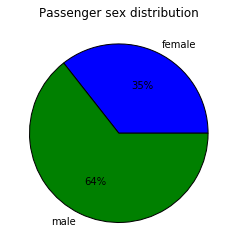

In [12]:
sex = df.groupby(['sex']).size()
print sex
plt.subplot(aspect=True)
plt.pie(sex, labels = sex.index.values, autopct='%i%%')
plt.title("Passenger sex distribution")

### What  is  the  passenger  service  class  distribution? 

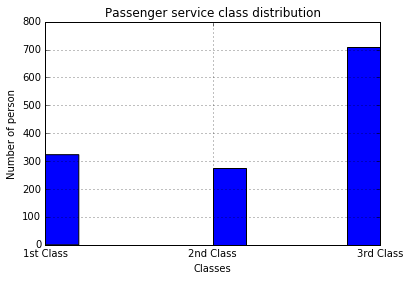

In [14]:
plt.figure();
df["pclass"].hist()
plt.xticks([1, 2, 3], ['1st Class', '2nd Class', '3rd Class'], rotation='horizontal')
plt.ylabel("Number of person")
plt.xlabel("Classes")
plt.title("Passenger service class distribution")

### How  does  the  mean  male  age  change  in  dependence  on  service  class? 

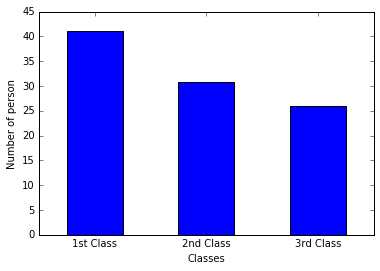

In [16]:
x = df[df.sex == "male"].groupby(['pclass']).mean()["age"]
x.plot(kind = "bar")
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'], rotation='horizontal')
plt.ylabel("Number of person")
plt.xlabel("Classes")

### How  does  the  mean  female  age  change  in  dependence  on  service  class? 

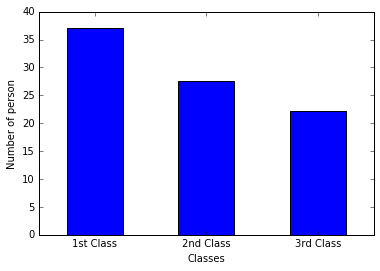

In [18]:
x = df[df.sex == "female"].groupby(['pclass']).mean()["age"]
x.plot(kind = "bar")
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'], rotation='horizontal')
plt.ylabel("Number of person")
plt.xlabel("Classes")

### What  is  the  proportion  of  survived  passengers?

survived
0    809
1    500
dtype: int64


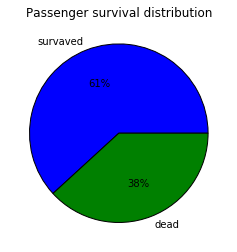

In [20]:
surv = df.groupby(['survived']).size()
print surv
plt.subplot(aspect=True)
plt.pie(surv, labels = ["survaved","dead"], autopct='%i%%')
plt.title("Passenger survival distribution")

### Is  it  true,  that  younger  passengers  survived  more  frequently  than  older passengers?

It is False


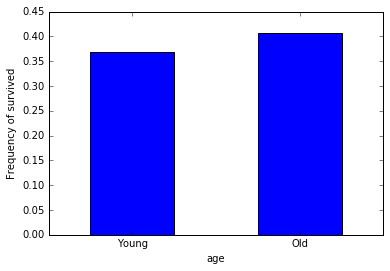

In [22]:
mean_age = df.age.mean()
x = df.groupby(df.age > mean_age).mean()["survived"]
print "It is %s"%(x[0] > x[1])
x.plot(kind = "bar")
plt.xticks([False, True], ['Young', 'Old'], rotation='horizontal')
plt.ylabel("Frequency of survived")

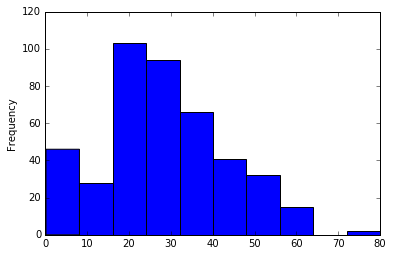

In [68]:
x = df[df['survived'] == 1].age
x.plot.hist()

### Is  it  true,  that  women  survived  more  frequently? 

It is True


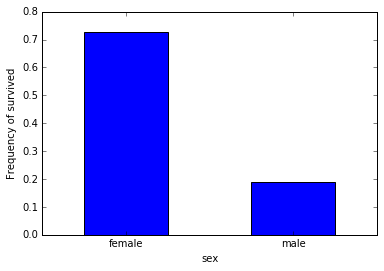

In [26]:
x = df.groupby("sex").mean()["survived"]
print "It is %s"%(x[0] > x[1])
x.plot(kind = "bar")
plt.xticks([False, True], ['female', 'male'], rotation='horizontal')
plt.ylabel("Frequency of survived")

### What  is  the  mean  of  the  fare?  What  is  the  variance  of  the  fare? 

In [28]:
mean = df.fare.mean()
maximum = df.fare.max() - mean
minimum = df.fare.min() - mean
print "mean of fare = %s"%mean
print "the highest price differs by %s"%maximum.round(2)
print "the lowest price differs by %s"%minimum.round(2)



mean of fare = 33.2954792813
the highest price differs by 479.03
the lowest price differs by -33.3


# Is  it  true,  that  passengers  with  more  expensive  tickets  survived  more frequently?

It is False


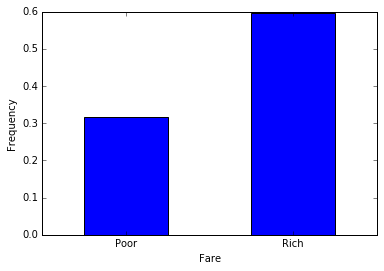

In [34]:
z= df[df.age < 40]

x = df.groupby(df.fare > df.fare.mean()).mean()["survived"]
print "It is %s"%(x[0] > x[1])
x.plot(kind = "bar")
plt.xticks([False, True], ['Poor', 'Rich'], rotation='horizontal')
plt.xlabel("Fare")
plt.ylabel("Frequency")


In [ ]:
### What  is  most  popular  male  name  on  the  ship? 

In [32]:
result = []
for el in df[df.sex == "male"].name:
    result.append(el.split(" ")[2])
    
df2 = pd.DataFrame(result)

df2.mode()

,0
0,William
